CREDIT EDA ASSIGNMENT 

In [1]:
#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline



In [3]:
#reading csv files using pandas 
df0 = pd.read_csv('application_data.csv')
df1 = pd.read_csv('previous_application.csv')
df2 = pd.read_csv('columns_description.csv', encoding = "latin1") #got an error saying 'utf-8' codec can't decode byte 0x92 in position 18: invalid start byte' used this encoding to help read csv file. 


In [4]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

Analysis of first data frame

In [5]:
df0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df0.shape

(307511, 122)

In [7]:
df0.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
df0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
#dropping last columns as many null values and inital columns enough for EDA
df3 = df0.drop(columns = df0.loc[:, 'REGION_RATING_CLIENT':'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [10]:
df3.isnull().sum()                                                                                                                       

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [11]:
#percentage of null values in OWN_CAR_AGE column & OCCUPATION_TYPE column
202929*100/307511


65.9908100848425

In [12]:
96391*100/307511

31.345545362604916

In [13]:
#dropping OWN_CAR_AGE column as other parameters/variables can be counted for analysis 
df4 = df3.drop(columns=['OWN_CAR_AGE'])

In [14]:
df4.head(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0


Text(0.5, 0, 'TARGET')

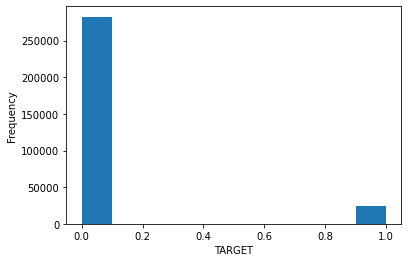

In [79]:
df4.TARGET.plot.hist()
plt.xlabel('TARGET')


Text(0.5, 0, 'AMT_CREDIT')

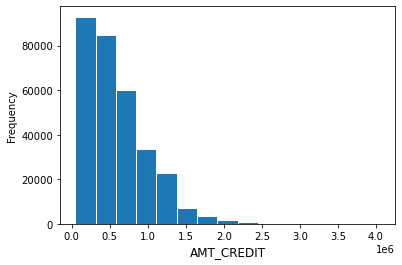

In [78]:
df4.AMT_CREDIT.plot.hist(edgecolor='white', bins=15)
plt.xlabel('AMT_CREDIT' ,fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

<AxesSubplot:ylabel='Frequency'>

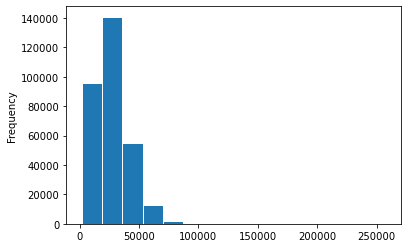

In [17]:
df4.AMT_ANNUITY.plot.hist(edgecolor='white', bins=15)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

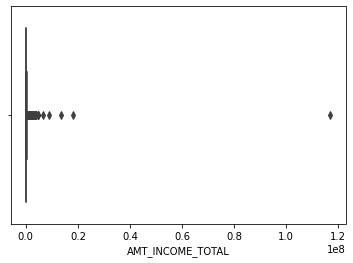

In [18]:
sns.boxplot(df4.AMT_INCOME_TOTAL)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='NAME_INCOME_TYPE'>

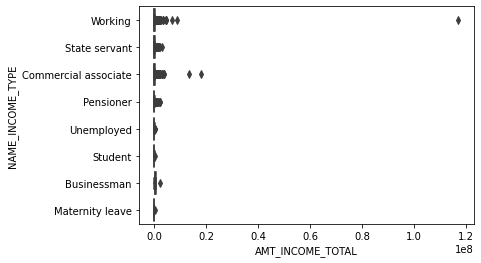

In [19]:
sns.boxplot(y =df4.NAME_INCOME_TYPE, x = df4.AMT_INCOME_TOTAL)

In [20]:
df4[df4.AMT_INCOME_TOTAL>12000000] 
#Working and Commercial associates income type with Secondary or Higher education have the highest income total

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,1,1,0,1,0,0,Laborers,3.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-15704,-4961,-3338.0,-4728,1,1,0,1,0,0,NaN,4.0
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-13551,-280,-3953.0,-4972,1,1,1,1,0,0,NaN,2.0


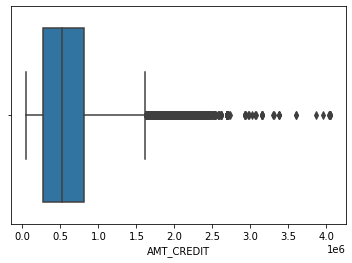

In [21]:
sns.boxplot(df4.AMT_CREDIT) 
plt.show()

In [22]:
#segmented univariate analysis (for defaulters and non defaulters targets)
df5 = df4[df4.TARGET==0]
df5

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,-24384,365243,-7369.0,-2357,1,0,0,1,1,0,NaN,1.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0


In [23]:
df5.NAME_CONTRACT_TYPE.value_counts(normalize=True)
#90% of the loans given are cash loans

Cash loans         0.9021
Revolving loans    0.0979
Name: NAME_CONTRACT_TYPE, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

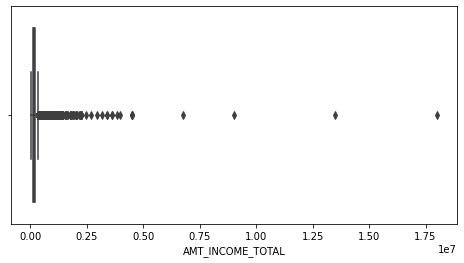

In [24]:
plt.figure(figsize=[8,4])
sns.boxplot(df5.AMT_INCOME_TOTAL)

<AxesSubplot:xlabel='AMT_CREDIT'>

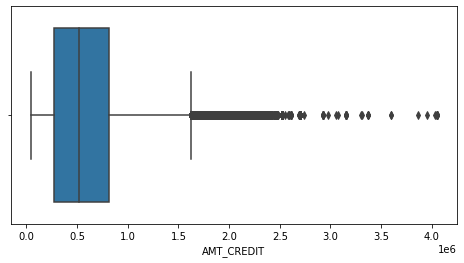

In [25]:
plt.figure(figsize=[8,4])
sns.boxplot(df5.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_ANNUITY'>

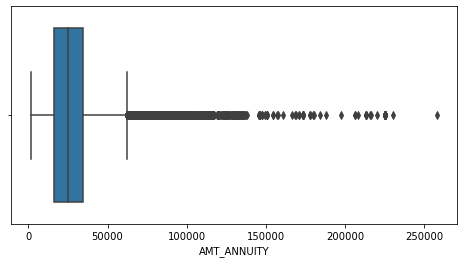

In [26]:
plt.figure(figsize=[8,4])
sns.boxplot(df5.AMT_ANNUITY)

In [27]:
df6 = df4[df4.TARGET==1]
df6

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-9918,-3048,-8507.0,-2580,1,1,1,1,0,0,Laborers,3.0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500.0,-4704,1,1,1,1,0,0,Laborers,3.0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.008575,-20644,-3147,-8921.0,-3832,1,1,0,1,1,0,Managers,2.0
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,-16471,-286,-8291.0,-9,1,1,0,1,0,0,Sales staff,2.0


In [28]:
df6.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

In [29]:
df6.NAME_INCOME_TYPE.value_counts(normalize=True)
#maternity leave, unemployed and state servants seem to have the lowest propertions from the income type data

Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

In [30]:
df6.NAME_EDUCATION_TYPE.value_counts(normalize=True)
#more loans are given to secondary schooling education type and the lowest to academic degree holders

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

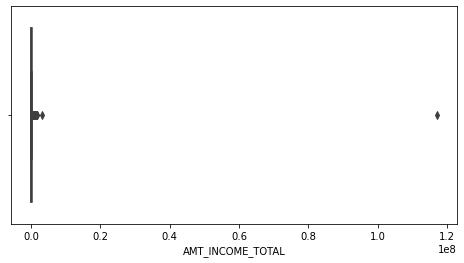

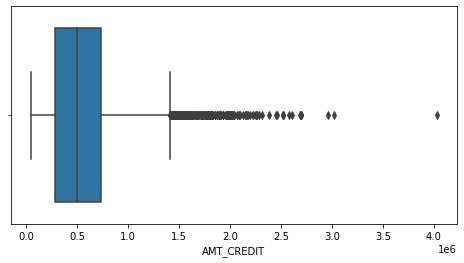

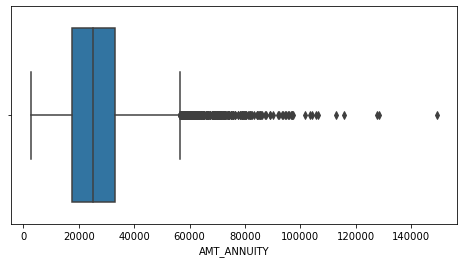

In [31]:
plt.figure(figsize=[8,4])
sns.boxplot(df6.AMT_INCOME_TOTAL)

plt.figure(figsize=[8,4])
sns.boxplot(df6.AMT_CREDIT)

plt.figure(figsize=[8,4])
sns.boxplot(df6.AMT_ANNUITY)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='NAME_INCOME_TYPE'>

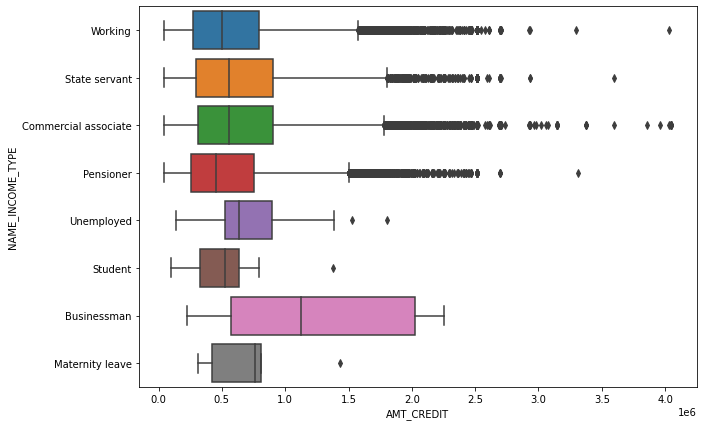

In [32]:
plt.figure(figsize=[10,7])
sns.boxplot(y = df4.NAME_INCOME_TYPE, x =df4.AMT_CREDIT)
#Working and Commercial associates have highest outliers in cerdit amount as well, although commercial associate income type has more bulk of higher ceridt amount. 
#major bulk of users from businessman income type with 75th percentile being upto 20L of loan amount and maximum being under 25L

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='NAME_INCOME_TYPE'>

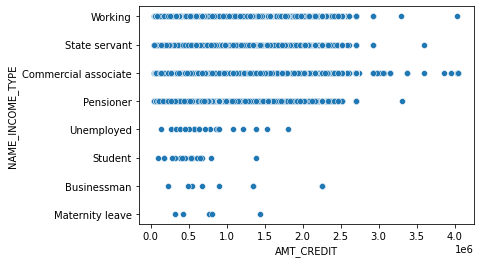

In [33]:
sns.scatterplot(y = df4.NAME_INCOME_TYPE, x =df4.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='NAME_INCOME_TYPE'>

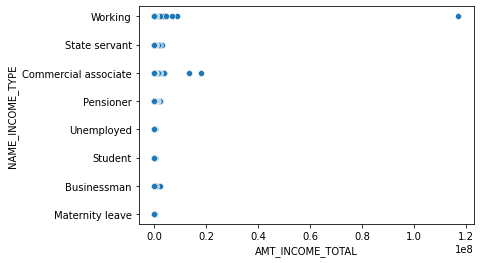

In [34]:
sns.scatterplot(y = df4.NAME_INCOME_TYPE, x =df4.AMT_INCOME_TOTAL)

In [35]:
df4.NAME_FAMILY_STATUS.value_counts(normalize=True) #married people have opted for more loans

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

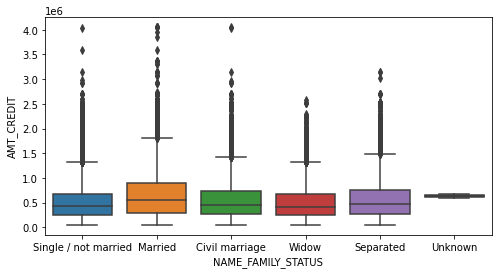

In [36]:
plt.figure(figsize=[8,4])
sns.boxplot(x=df4.NAME_FAMILY_STATUS, y=df4['AMT_CREDIT'])
plt.show()
#Married family status has the highest range of loan users, with more outliers as well and Single, seprated and civil marriage families have higher bulk in the mean range of values for loan requirements.


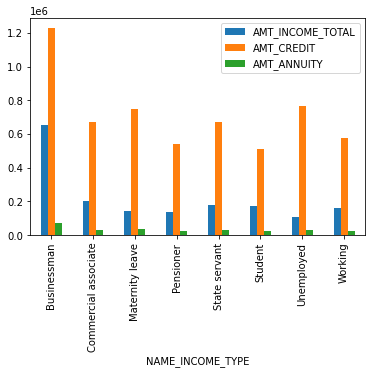

In [37]:

df4.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'].mean().plot.bar()
plt.show()

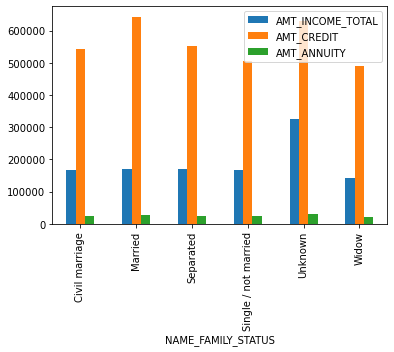

In [38]:
df4.groupby('NAME_FAMILY_STATUS')['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'].mean().plot.bar()
plt.show()

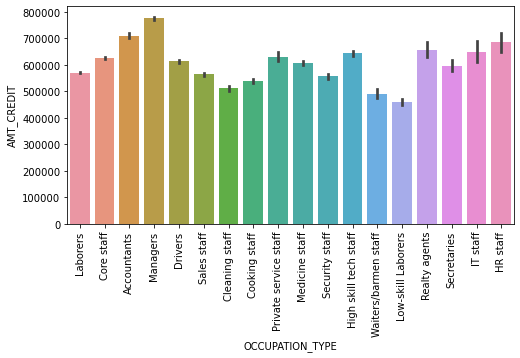

In [39]:
plt.figure(figsize=[8,4])
sns.barplot(x=df4.OCCUPATION_TYPE, y=df4['AMT_CREDIT'])
plt.xticks(rotation = 90)
plt.show()

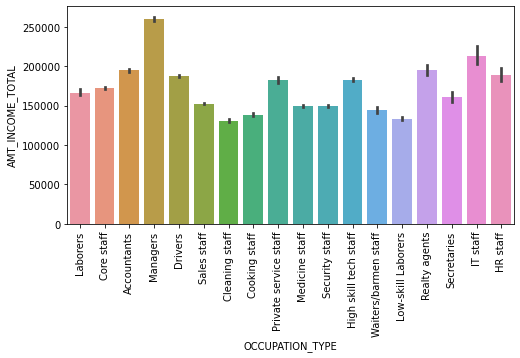

In [40]:
plt.figure(figsize=[8,4])
sns.barplot(x=df4.OCCUPATION_TYPE, y=df4['AMT_INCOME_TOTAL'])
plt.xticks(rotation = 90)
plt.show()

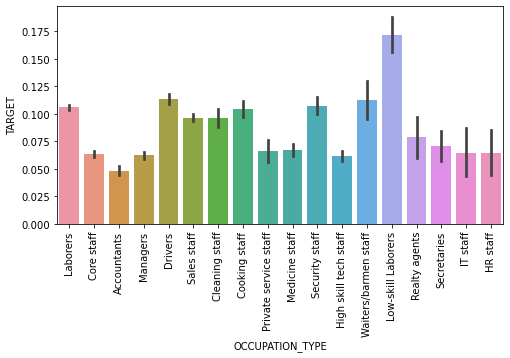

In [41]:
plt.figure(figsize=[8,4])
sns.barplot(x=df4.OCCUPATION_TYPE, y=df4['TARGET'])
plt.xticks(rotation = 90)
plt.show()

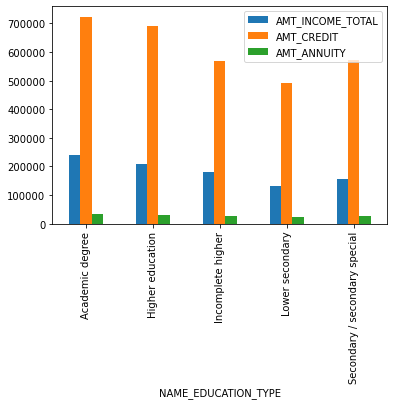

In [42]:
df4.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_CREDIT'>

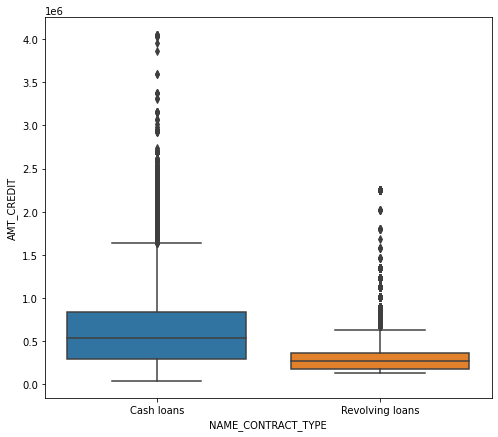

In [43]:
plt.figure(figsize=[8,7])
sns.boxplot(x=df4.NAME_CONTRACT_TYPE, y=df4.AMT_CREDIT)
#cash loans have higher percentile of users above the 75th percentile and highest values compared to revolving loans 

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_ANNUITY'>

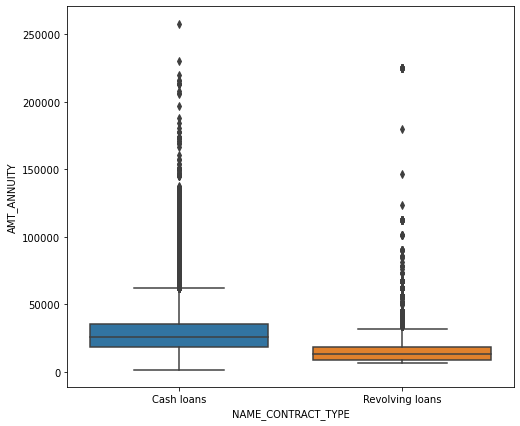

In [44]:
plt.figure(figsize=[8,7])
sns.boxplot(x=df4.NAME_CONTRACT_TYPE, y=df4.AMT_ANNUITY)


Analysis of second data frame 

In [45]:
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [46]:
df1.shape

(1670214, 37)

In [47]:
df1.isnull().sum()                                       

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [48]:
#% of missing values in AMT_ANNUITY 
372235*100/1670214

22.286665062081866

In [49]:
#% of missing values in AMT_DOWN_PAYMENT                
895844*100/1670214

53.636480115721696

<AxesSubplot:xlabel='AMT_DOWN_PAYMENT'>

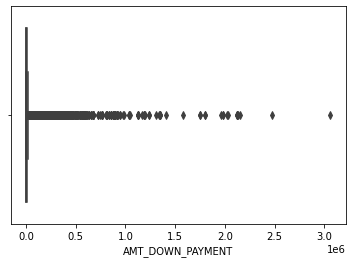

In [50]:
sns.boxplot(df1.AMT_DOWN_PAYMENT)

In [51]:
#% of missing values in RATE_DOWN_PAYMENT  
895844*100/1670214

53.636480115721696

<AxesSubplot:xlabel='RATE_DOWN_PAYMENT'>

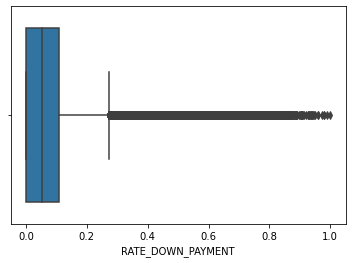

In [52]:
sns.boxplot(df1.RATE_DOWN_PAYMENT)

In [53]:
#% of missing values in RATE_INTEREST_PRIMARY          
1664263*100/1670214

99.6436983524267

In [54]:
#% of missing values in RATE_INTEREST_PRIVILEGED       
1664263*100/1670214

99.6436983524267

In [55]:
#% of missing values in DAYS_FIRST_DRAWING to NFLAG_INSURED_ON_APPROVAL       
673065*100/1670214

40.29812946125467

<AxesSubplot:xlabel='AMT_APPLICATION', ylabel='Density'>

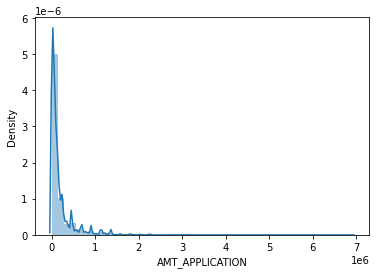

In [56]:
sns.distplot(df1.AMT_APPLICATION)


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

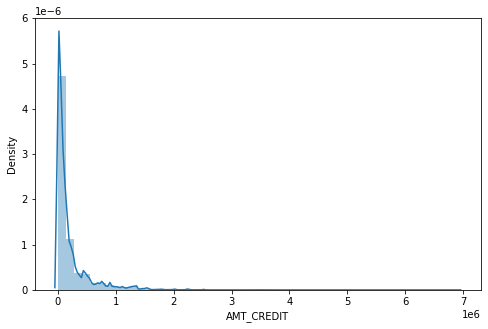

In [57]:
plt.figure(figsize=[8,5])
sns.distplot(df1.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_CREDIT'>

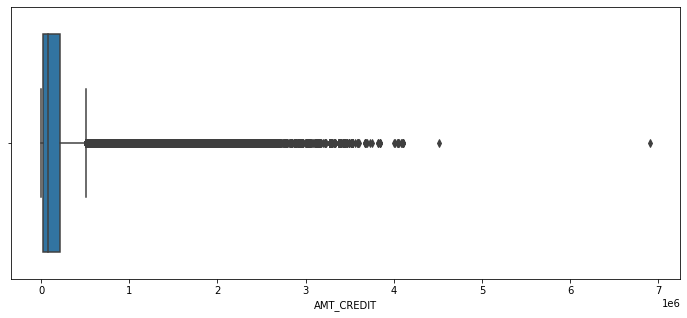

In [58]:
plt.figure(figsize=[12,5])
sns.boxplot(df1.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_APPLICATION'>

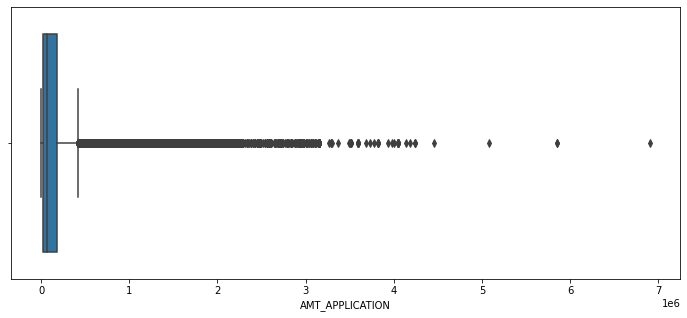

In [59]:
plt.figure(figsize=[12,5])
sns.boxplot(df1.AMT_APPLICATION)

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_APPLICATION'>

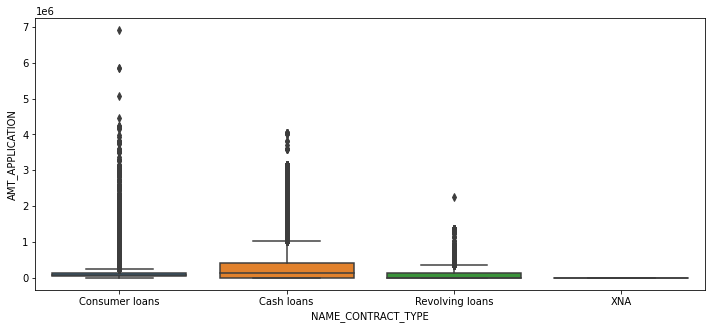

In [60]:
plt.figure(figsize=[12,5])
sns.boxplot(y=df1.AMT_APPLICATION, x=df1.NAME_CONTRACT_TYPE)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_APPLICATION'>

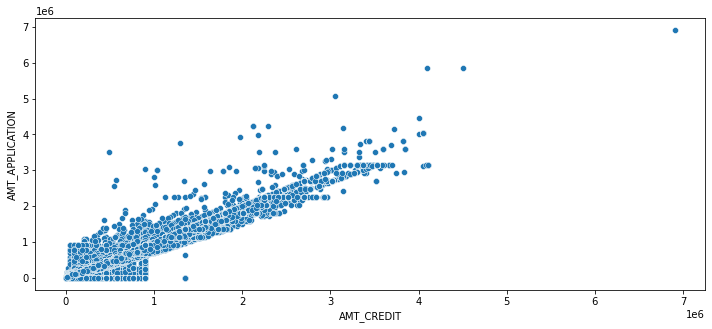

In [61]:
plt.figure(figsize=[12,5])
sns.scatterplot(y=df1.AMT_APPLICATION, x=df1.AMT_CREDIT)

In [62]:
#merging data frames

df7 = pd.merge(df4[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL',  'AMT_CREDIT',  'NAME_INCOME_TYPE',  'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE'  ]], df1[['SK_ID_CURR','AMT_APPLICATION', 'AMT_CREDIT']], on = 'SK_ID_CURR', how = 'inner')
df7

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,AMT_APPLICATION,AMT_CREDIT_y
0,100002,1,Cash loans,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,Laborers,179055.0,179055.0
1,100003,0,Cash loans,270000.0,1293502.5,State servant,Higher education,Married,Core staff,900000.0,1035882.0
2,100003,0,Cash loans,270000.0,1293502.5,State servant,Higher education,Married,Core staff,337500.0,348637.5
3,100003,0,Cash loans,270000.0,1293502.5,State servant,Higher education,Married,Core staff,68809.5,68053.5
4,100004,0,Revolving loans,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,Laborers,24282.0,20106.0
...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,157500.0,675000.0,Commercial associate,Higher education,Married,Laborers,229500.0,254340.0
1413697,456255,0,Cash loans,157500.0,675000.0,Commercial associate,Higher education,Married,Laborers,45000.0,45000.0
1413698,456255,0,Cash loans,157500.0,675000.0,Commercial associate,Higher education,Married,Laborers,765000.0,1067940.0
1413699,456255,0,Cash loans,157500.0,675000.0,Commercial associate,Higher education,Married,Laborers,1170000.0,1271929.5


<AxesSubplot:xlabel='AMT_CREDIT_x', ylabel='AMT_CREDIT_y'>

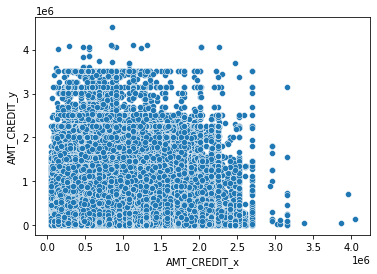

In [63]:
sns.scatterplot(x=df7.AMT_CREDIT_x, y=df7.AMT_CREDIT_y)

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_CREDIT_y'>

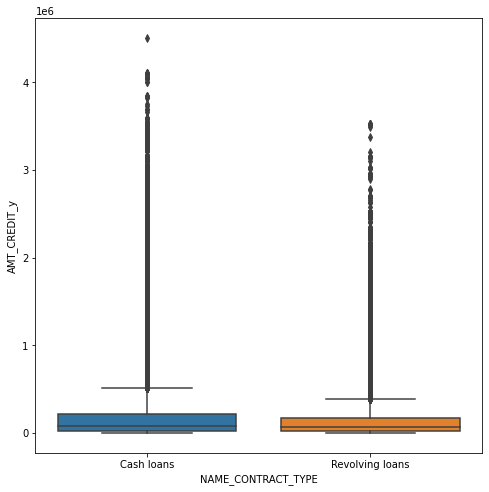

In [64]:
plt.figure(figsize=[8,8])
sns.boxplot(x=df7.NAME_CONTRACT_TYPE, y=df7.AMT_CREDIT_y)

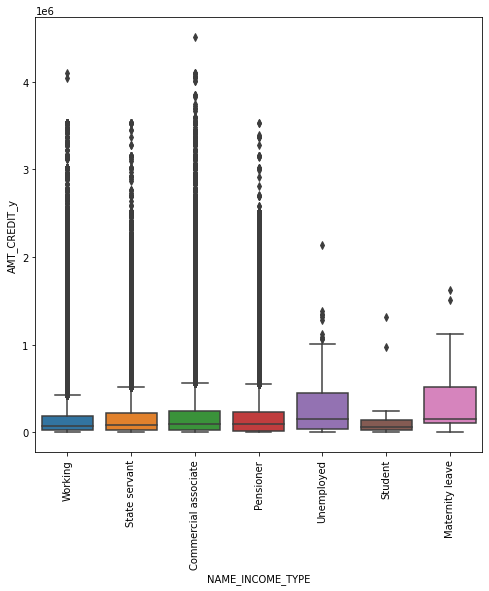

In [65]:
plt.figure(figsize=[8,8])
sns.boxplot(x=df7.NAME_INCOME_TYPE, y=df7.AMT_CREDIT_y)
plt.xticks(rotation = 90)
plt.show()

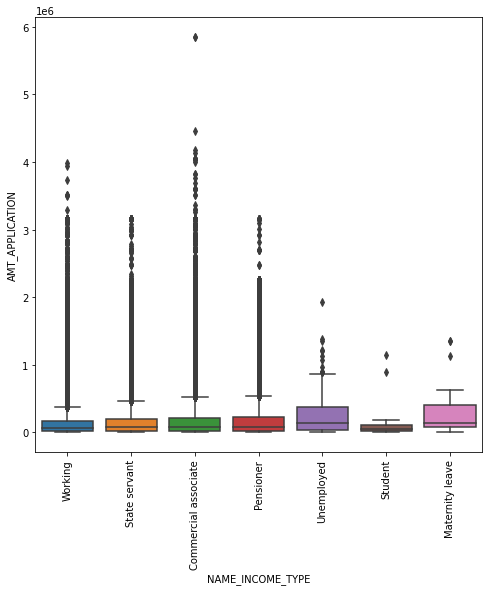

In [66]:
plt.figure(figsize=[8,8])
sns.boxplot(x=df7.NAME_INCOME_TYPE, y=df7.AMT_APPLICATION)
plt.xticks(rotation = 90)
plt.show()

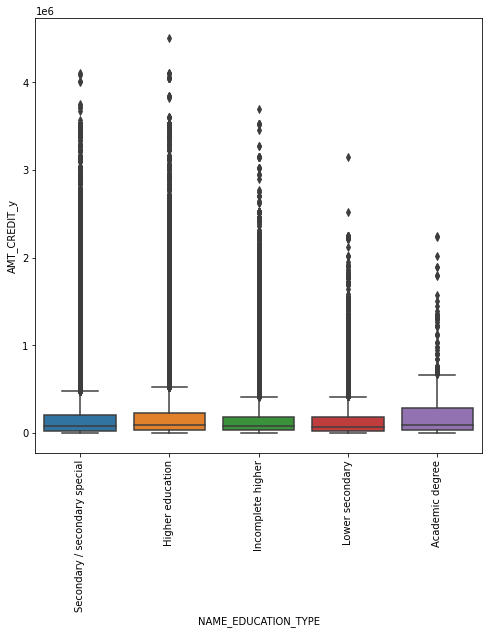

In [67]:
plt.figure(figsize=[8,8])
sns.boxplot(x=df7.NAME_EDUCATION_TYPE, y=df7.AMT_CREDIT_y)
plt.xticks(rotation = 90)
plt.show()

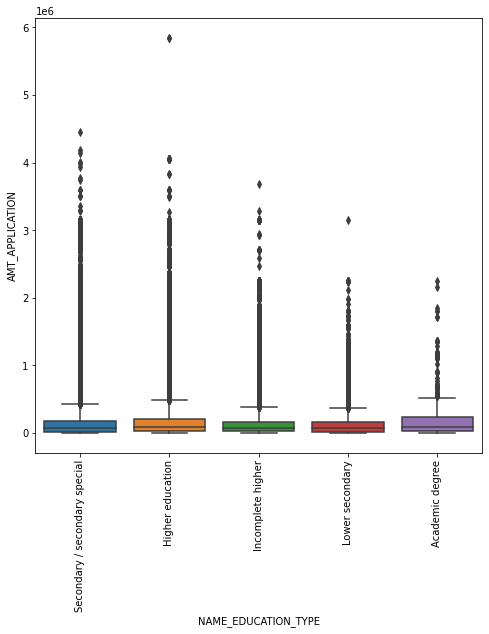

In [68]:
plt.figure(figsize=[8,8])
sns.boxplot(x=df7.NAME_EDUCATION_TYPE, y=df7.AMT_APPLICATION)
plt.xticks(rotation = 90)
plt.show()

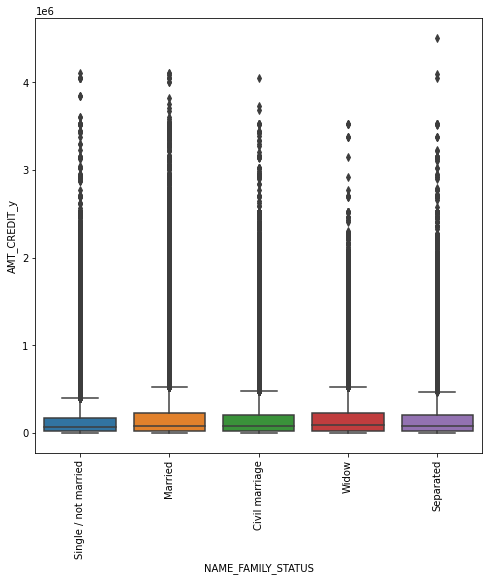

In [69]:
plt.figure(figsize=[8,8])
sns.boxplot(x=df7.NAME_FAMILY_STATUS, y=df7.AMT_CREDIT_y)
plt.xticks(rotation = 90)
plt.show()

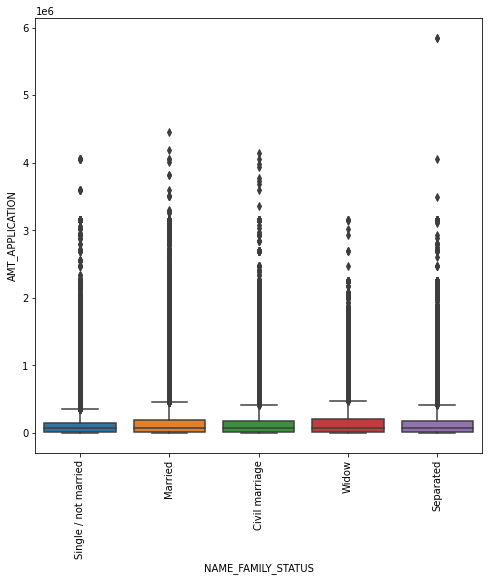

In [70]:
plt.figure(figsize=[8,8])
sns.boxplot(x=df7.NAME_FAMILY_STATUS, y=df7.AMT_APPLICATION)
plt.xticks(rotation = 90)
plt.show()

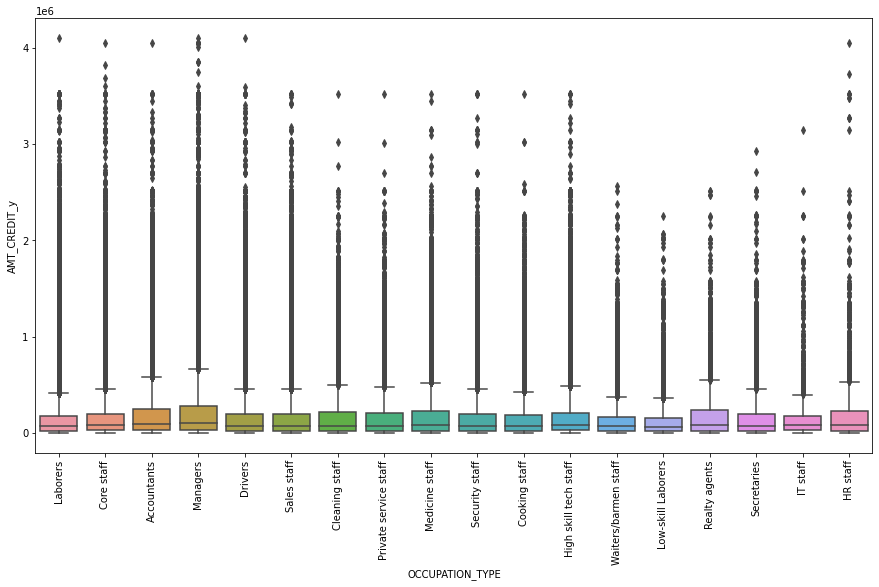

In [71]:
plt.figure(figsize=[15,8])
sns.boxplot(x=df7.OCCUPATION_TYPE, y=df7.AMT_CREDIT_y)
plt.xticks(rotation = 90)
plt.show()

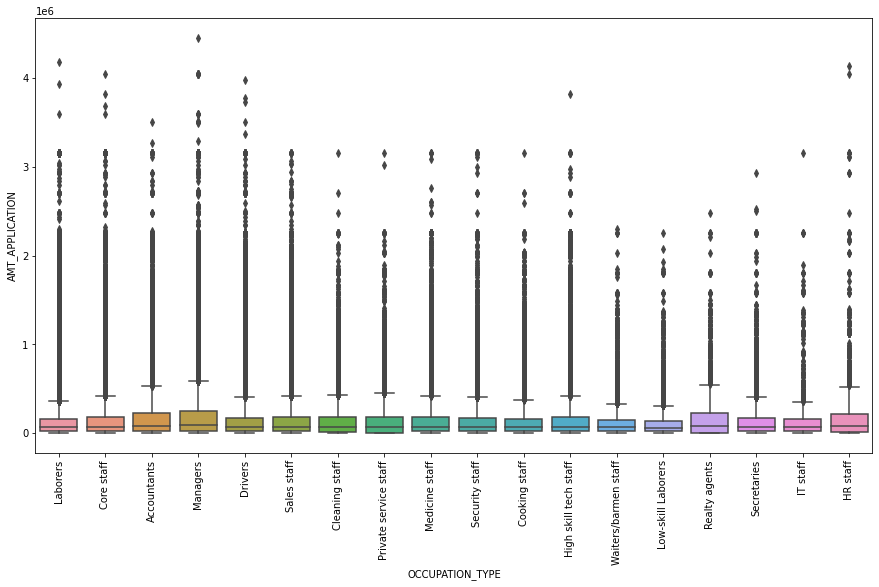

In [72]:
plt.figure(figsize=[15,8])
sns.boxplot(x=df7.OCCUPATION_TYPE, y=df7.AMT_APPLICATION)
plt.xticks(rotation = 90)
plt.show()